Start : iris

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import os
%matplotlib inline


Load the data

In [2]:
coloums = ['Sepal length','Sepal width','Petal width','Class_labels']
df = pd.read_csv('IRIS.csv',names=coloums)
df.head()


,Sepal length,Sepal width,Petal width,Class_labels
sepal_length,sepal_width,petal_length,petal_width,species
5.1,3.5,1.4,0.2,Iris-setosa
4.9,3,1.4,0.2,Iris-setosa
4.7,3.2,1.3,0.2,Iris-setosa
4.6,3.1,1.5,0.2,Iris-setosa


In [3]:
df = pd.read_csv('IRIS.csv')
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
df.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [6]:
df['species'].value_counts()

Iris-virginica     50
Iris-setosa        50
Iris-versicolor    50
Name: species, dtype: int64

In [7]:
#sns.pairplot(df,hue = 'Class_labels')

preprocess data

In [8]:
df.isnull().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

EXPLORATORY DATA ANALYSIS

<AxesSubplot:>

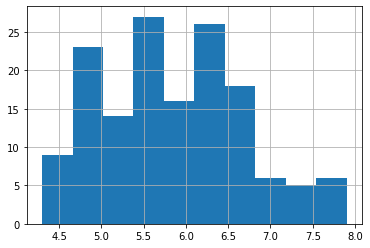

In [9]:
df['sepal_length'].hist()
#count -y value -x

<AxesSubplot:>

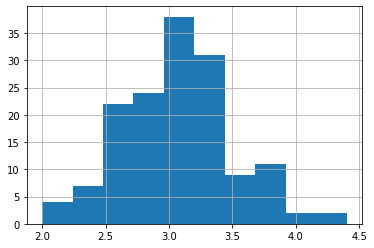

In [10]:
df['sepal_width'].hist()

<AxesSubplot:>

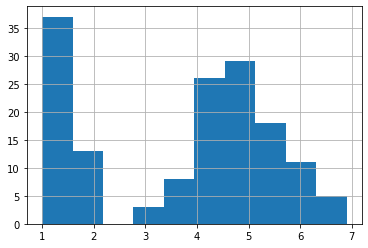

In [11]:
df['petal_length'].hist()

<AxesSubplot:>

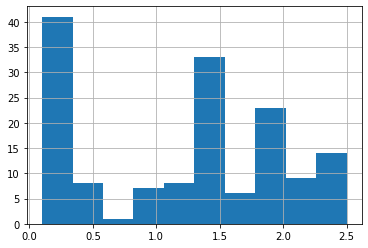

In [12]:
df['petal_width'].hist()

In [13]:
colors = ['red','green','blue']
species = ['Iris-virginica','Iris-versicolor', 'Iris-setosa']

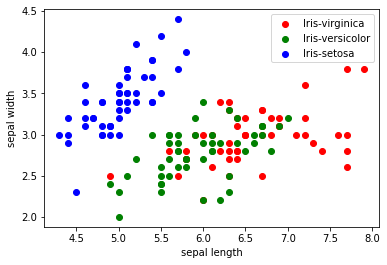

In [14]:
for i in range(3):
    x = df[df['species'] == species[i]]
    plt.scatter(x['sepal_length'], x['sepal_width'], c = colors[i], label=species[i])
plt.xlabel("sepal length")
plt.ylabel("sepal width")
plt.legend()


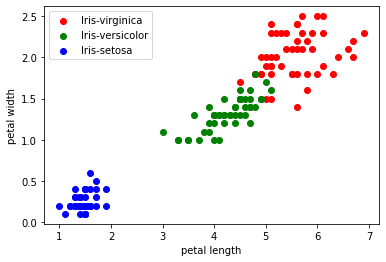

In [15]:
for i in range(3):
    x = df[df['species'] == species[i]]
    plt.scatter(x['petal_length'], x['petal_width'], c = colors[i], label=species[i])
plt.xlabel("petal length")
plt.ylabel("petal width")
plt.legend()

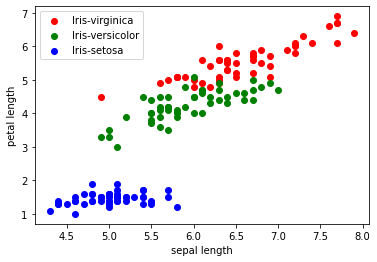

In [16]:
for i in range(3):
    x = df[df['species'] == species[i]]
    plt.scatter(x['sepal_length'], x['petal_length'], c = colors[i], label=species[i])
plt.xlabel("sepal length")
plt.ylabel("petal length")
plt.legend()

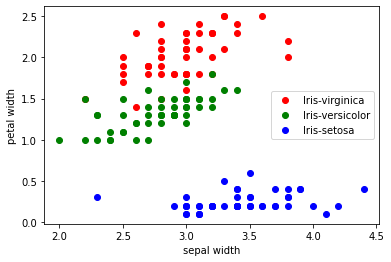

In [17]:
for i in range(3):
    x = df[df['species'] == species[i]]
    plt.scatter(x['sepal_width'], x['petal_width'], c = colors[i], label=species[i])
plt.xlabel("sepal width")
plt.ylabel("petal width")
plt.legend()

CORRELATION MATRIX

In [18]:
df.corr()

,sepal_length,sepal_width,petal_length,petal_width
sepal_length,1.000000,-0.109369,0.871754,0.817954
sepal_width,-0.109369,1.000000,-0.420516,-0.356544
petal_length,0.871754,-0.420516,1.000000,0.962757
petal_width,0.817954,-0.356544,0.962757,1.000000


<AxesSubplot:>

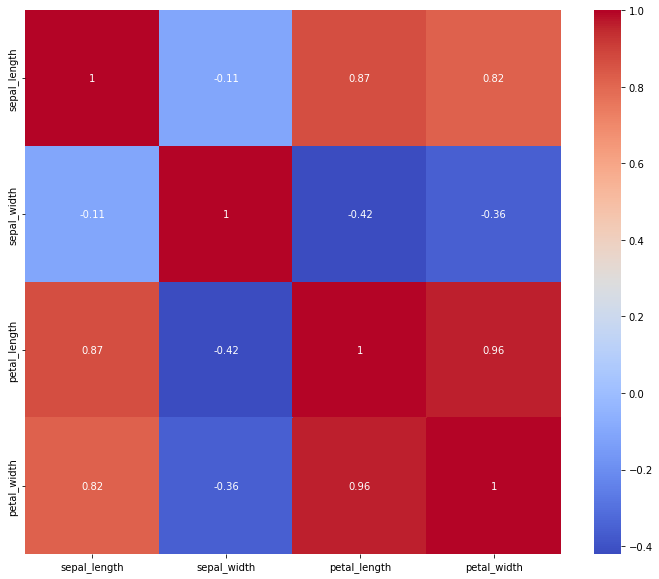

In [19]:
corr = df.corr()
fig, ax = plt.subplots(figsize=(12,10))
sns.heatmap(corr,annot = True, ax=ax ,cmap='coolwarm')

Label encoder

In [20]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [21]:
df['species'] = le.fit_transform(df['species'])
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


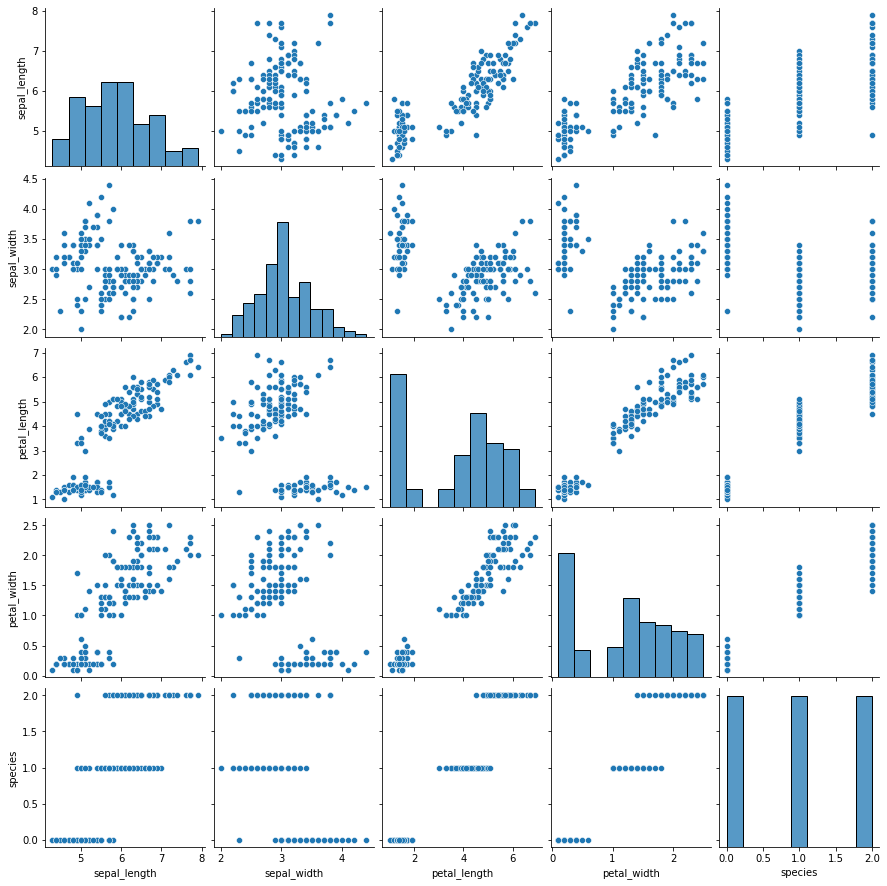

In [22]:
sns.pairplot(df)

model training 

In [23]:
from sklearn.model_selection import train_test_split

x = df.drop(columns=['species'])
y = df['species']
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.30)

In [24]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()

In [25]:
model.fit(x_train,y_train)

c:\Users\L.VENKATASAI\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [26]:
print("acc:",model.score(x_test,y_test)*100)

acc: 91.11111111111111


In [27]:
from sklearn.neighbors import KNeighborsClassifier
modeln = KNeighborsClassifier()


In [28]:
modeln.fit(x_train,y_train)

KNeighborsClassifier()

In [29]:
print("acc:",modeln.score(x_test,y_test)*100)

acc: 93.33333333333333


In [30]:
from sklearn.tree import DecisionTreeClassifier
modeld = DecisionTreeClassifier()

In [31]:
modeld.fit(x_train,y_train)

DecisionTreeClassifier()

In [32]:
print("acc:",modeld.score(x_test,y_test)*100)

acc: 88.88888888888889


In [33]:
# Take input from the user for prediction
sepal_length = float(input("Enter sepal length: "))
sepal_width = float(input("Enter sepal width: "))
petal_length = float(input("Enter petal length: "))
petal_width = float(input("Enter petal width: "))

input_data = [[sepal_length, sepal_width, petal_length, petal_width]]

# Perform prediction using the trained models
lr_prediction = le.inverse_transform(model.predict(input_data))
knn_prediction = le.inverse_transform(modeln.predict(input_data))
dt_prediction = le.inverse_transform(modeld.predict(input_data))

print("Logistic Regression Prediction:", lr_prediction)
print("K-Nearest Neighbors Prediction:", knn_prediction)
print("Decision Tree Prediction:", dt_prediction)


Logistic Regression Prediction: ['Iris-virginica']
K-Nearest Neighbors Prediction: ['Iris-virginica']
Decision Tree Prediction: ['Iris-virginica']


c:\Users\L.VENKATASAI\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
c:\Users\L.VENKATASAI\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
c:\Users\L.VENKATASAI\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


In [34]:
print((95.55+97.777+93.333)/3)

95.55333333333333
